<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-07-14 17:38:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-07-14 17:38:18 (14.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_0         154 KB  anaconda

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_0     conda-forge --> 2019.6.16-py36_0 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0 conda-forge --> 2019.5.15-0      anaconda


certifi-2019.6.16    | 154 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


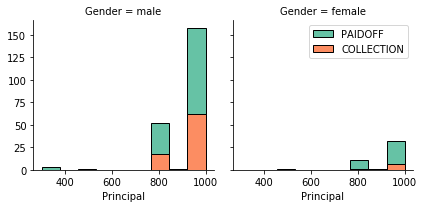

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

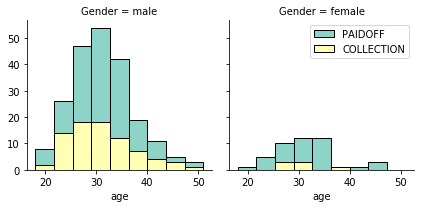

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

## 1/ Pre-processing Dataset for K-means, SVM, and Logistic Regression

### Lets look at the day of the week people get the loan 

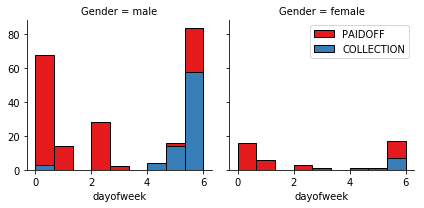

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets define feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

## 2/ Preprocessing Dataset for the Decision Tree

In [20]:
df['education'].unique().tolist()

['High School or Below', 'Bechalor', 'college', 'Master or Above']

In [31]:
X_tree = df[['Principal','terms','age','Gender','weekend', 'education']]
X_tree.replace(to_replace=df['education'].unique().tolist(), value=[0, 1, 2, 3], inplace=True)
X_tree.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,0
1,1000,30,33,1,0,1
2,1000,15,27,0,0,2
3,1000,30,28,1,1,2
4,1000,30,29,0,1,2


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (311, 9) (311,)
Test set:  (35, 9) (35,)


In [22]:
a = (y_test == 'PAIDOFF')
count = 0

for element in a:
    if element:
        count +=1
        
count

30

In [23]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
# Calculate the Jaccard accuracy index for values of k ranging from 1 to 10
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
yhat_KN_dict = {}

for n in range (1, Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat_KN = neigh.predict(X_test)
    yhat_KN_dict[str(n)] = yhat_KN
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KN)
    std_acc[n-1] = np.std(yhat_KN==y_test)/np.sqrt(yhat_KN.shape[0])
    
mean_acc

array([0.68571429, 0.62857143, 0.65714286, 0.68571429, 0.77142857,
       0.74285714, 0.88571429, 0.82857143, 0.82857143, 0.77142857])

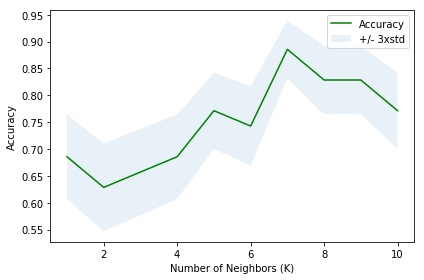

In [25]:
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
# Best K for the KNN Model
print("Best accuracy is at k = ", mean_acc.argmax()+1, " with value: ", mean_acc.max())

Best accuracy is at k =  7  with value:  0.8857142857142857


### Model Accuracy Evaluation Using Test set

In [27]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [28]:
# Jaccard similarity Index
jaccard_similarity_score(y_test, yhat_KN_dict[str(mean_acc.argmax()+1)])

0.8857142857142857

In [29]:
# f1-score
f1_score(y_test, yhat_KN_dict[str(mean_acc.argmax()+1)], average='weighted')

0.8932676518883415

# Decision Tree

### Data Analysis and Modelling

In [32]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y, test_size = 0.1, random_state=4)
print("Train set: ", X_tree_train.shape, y_tree_train.shape)
print("Test set: ", X_tree_test.shape, y_tree_test.shape)

Train set:  (311, 6) (311,)
Test set:  (35, 6) (35,)


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# Modeling
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predTree = loanTree.predict(X_tree_test)

In [36]:
print(predTree[0:5])
print(y_tree_test[0:5])

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### Model Accuracy Evaluation

In [37]:
# Jaccard similarity Index
jaccard_similarity_score(y_tree_test, predTree)

0.6857142857142857

In [38]:
# f1-score
f1_score(y_test, predTree, average='weighted')

0.7238095238095238

#### Visualization

In [ ]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_0         148 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0      anaconda --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_0 anaconda --> 2019.6.16-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.6.16    | 148 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: - ^C
failed

CondaError: KeyboardInterrupt



In [39]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

%matplotlib inline

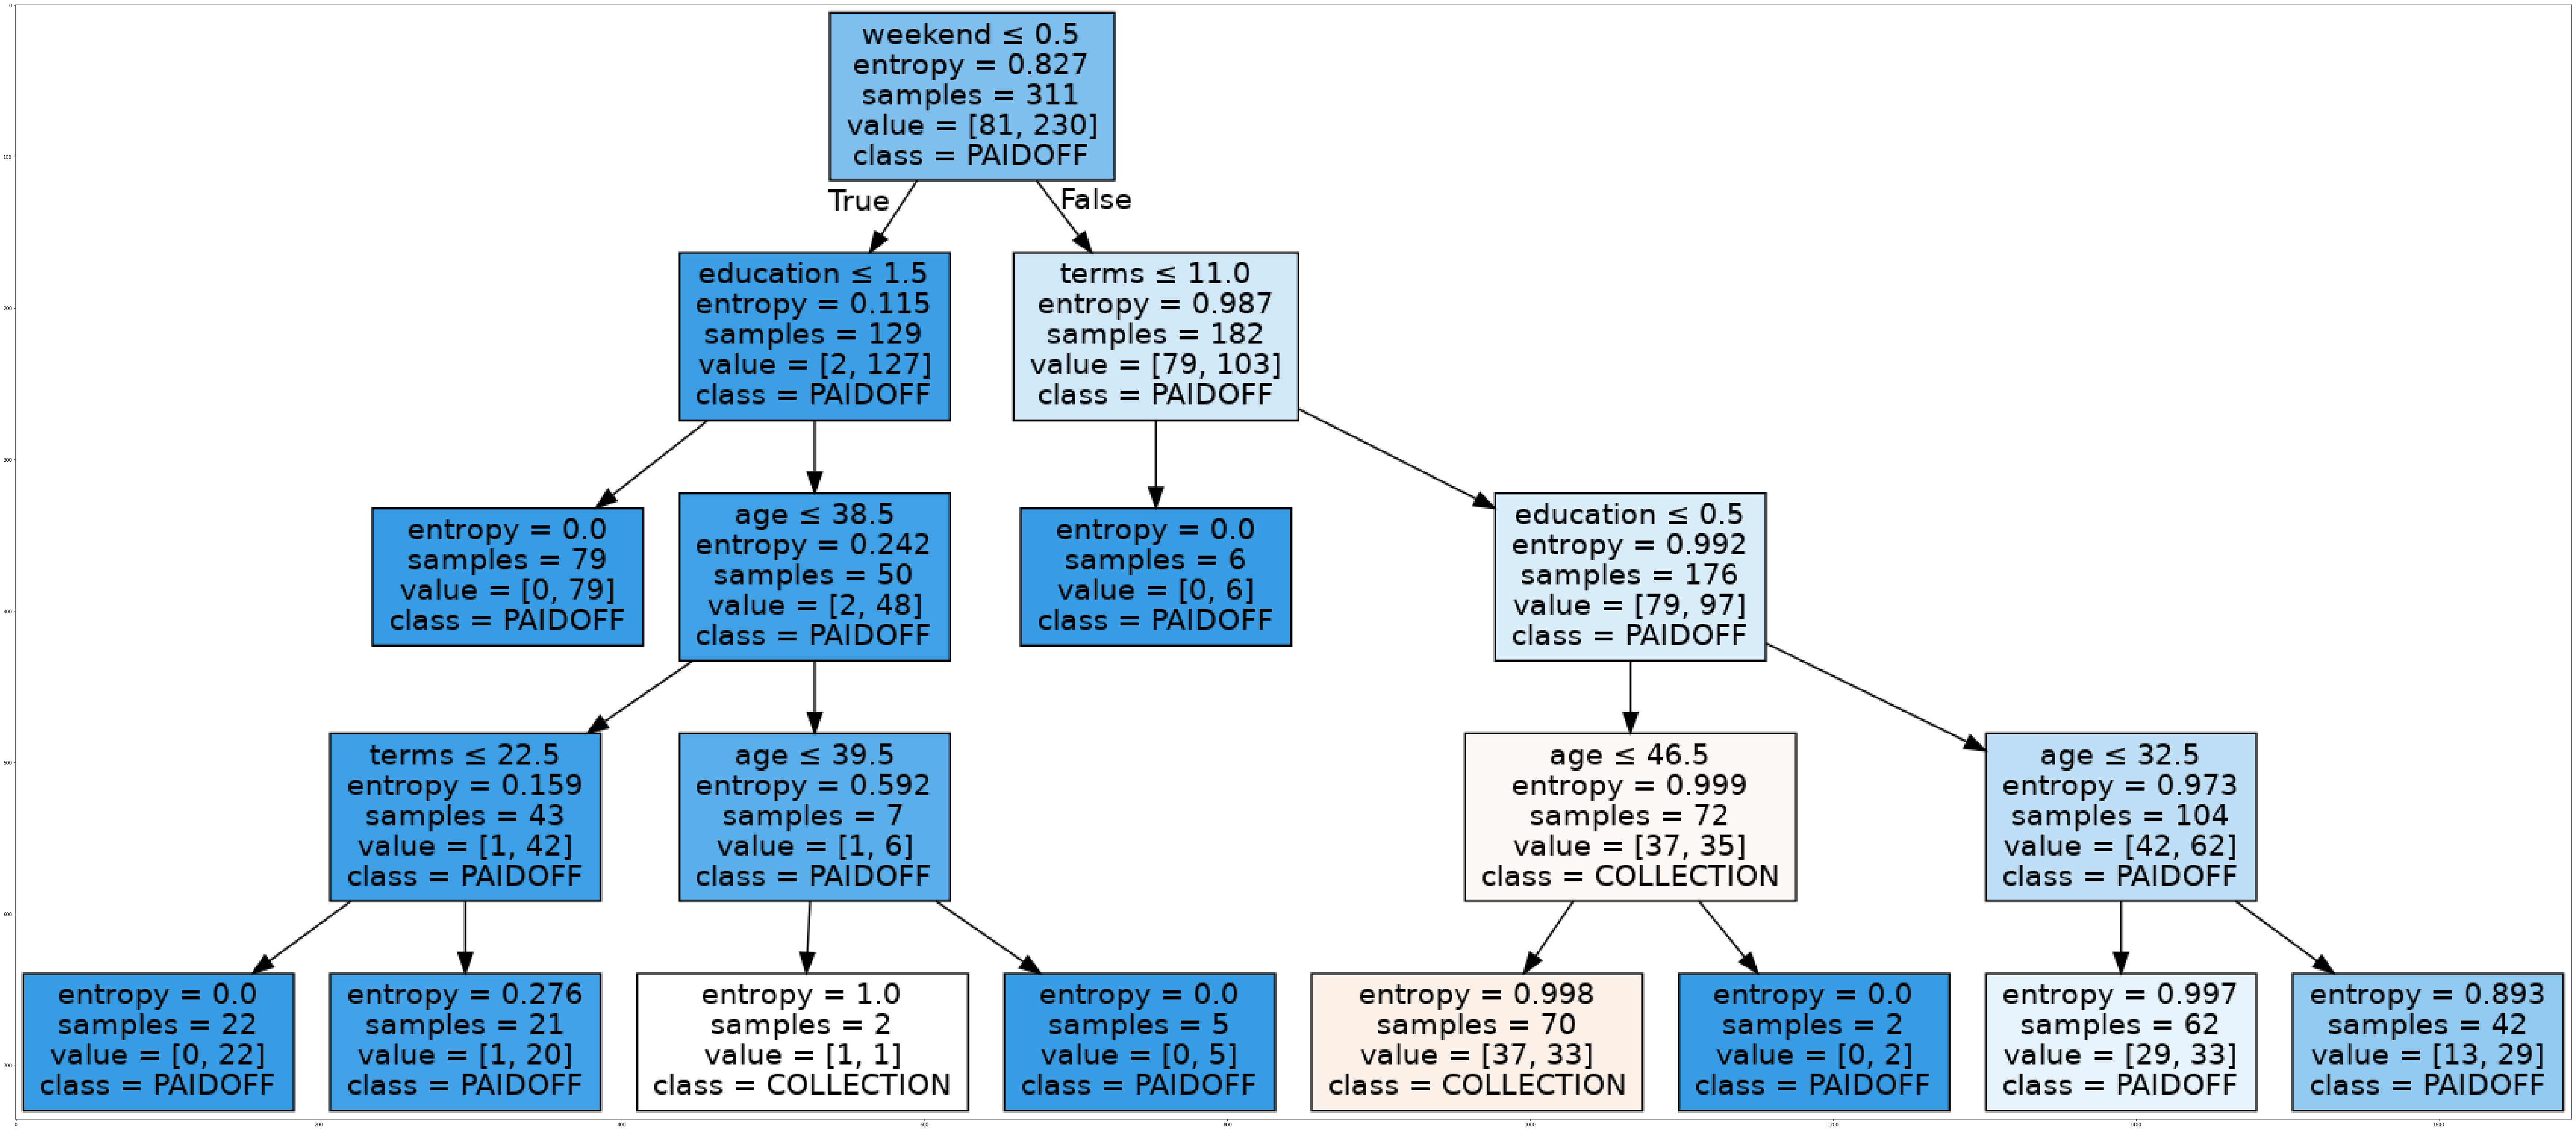

In [40]:
dot_data = StringIO()
filename = "loantree.png"
#featureNames = Feature.columns[0:9]
featureNames = ['Principal','terms','age','Gender','weekend', 'education']
targetNames = df['loan_status'].unique().tolist()
out = tree.export_graphviz(loanTree, feature_names=featureNames, class_names=np.unique(y_tree_train), out_file=dot_data, filled = True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img, interpolation='nearest')

# Support Vector Machine

In [41]:
from sklearn import svm
# Build a Support Vector Machine function with the kernel function being the Radial Basis Function
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
# Predicting y values from the test set
yhat_SVM_rbf = clf_rbf.predict(X_test)
yhat_SVM_rbf[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Model Accuracy Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.29      0.40      0.33         5
     PAIDOFF       0.89      0.83      0.86        30

   micro avg       0.77      0.77      0.77        35
   macro avg       0.59      0.62      0.60        35
weighted avg       0.81      0.77      0.79        35

[[25  5]
 [ 3  2]]


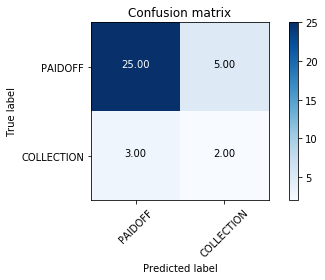

In [45]:
# Compute confusion matrix
cnf_matrix_SVM_rbf = confusion_matrix(y_test, yhat_SVM_rbf,labels=['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_SVM_rbf))

#Plot
plt.figure()
plot_confusion_matrix(cnf_matrix_SVM_rbf, classes=['PAIDOFF', 'COLLECTION'])


In [46]:
# Jaccard similarity index
jaccard_similarity_score(y_test, yhat_SVM_rbf)

0.7714285714285715

In [47]:
# f-1 score
f1_score(y_test, yhat_SVM_rbf, average='weighted')

0.786535303776683

### Building a kernel using linear function

In [48]:
# Build a Support Vector Machine function with the kernel function being the Radial Basis Function
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
yhat_SVM_linear = clf_linear.predict(X_test)
yhat_SVM_linear[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Model Accuracy Evaluation

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         5
     PAIDOFF       0.86      1.00      0.92        30

   micro avg       0.86      0.86      0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35

[[30  0]
 [ 5  0]]


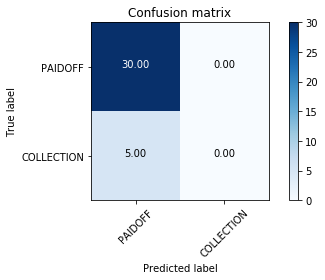

In [50]:
# Compute confusion matrix
cnf_matrix_SVM_linear = confusion_matrix(y_test, yhat_SVM_linear ,labels=['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_SVM_linear))

#Plot
plt.figure()
plot_confusion_matrix(cnf_matrix_SVM_linear, classes=['PAIDOFF', 'COLLECTION'])

In [51]:
# Jaccard similarity index
jaccard_similarity_score(y_test, yhat_SVM_linear)

0.8571428571428571

In [52]:
# f-1 score
f1_score(y_test, yhat_SVM_linear, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7912087912087912

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Logistic Regresssion Model Using Liblinear

In [54]:
LR_liblinear = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR_liblinear

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
yhat_LR_liblinear = LR_liblinear.predict(X_test)
yhat_LR_liblinear

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [56]:
yhat_LR_liblinear_prob = LR_liblinear.predict_proba(X_test)
yhat_LR_liblinear_prob[0:5]

array([[0.5 , 0.5 ],
       [0.44, 0.56],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.3 , 0.7 ]])

In [57]:
LR_liblinear.classes_

array(['COLLECTION', 'PAIDOFF'], dtype=object)

### Model Accuracy Evaluation

              precision    recall  f1-score   support

  COLLECTION       0.20      0.20      0.20         5
     PAIDOFF       0.87      0.87      0.87        30

   micro avg       0.77      0.77      0.77        35
   macro avg       0.53      0.53      0.53        35
weighted avg       0.77      0.77      0.77        35

[[26  4]
 [ 4  1]]


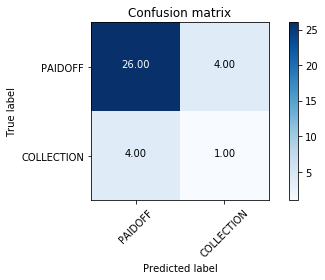

In [58]:
# Compute Confusion Matrix
cnf_matrix_LR_liblinear = confusion_matrix(y_test, yhat_LR_liblinear, labels=['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_LR_liblinear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR_liblinear, classes=['PAIDOFF','COLLECTION'], title='Confusion matrix'
)

In [59]:
# Jaccard similarity index
jaccard_similarity_score(y_test, yhat_LR_liblinear)

0.7714285714285715

In [60]:
# f-1 score
f1_score(y_test, yhat_LR_liblinear, average='weighted')

0.7714285714285715

In [61]:
# Log loss
log_loss(y_test, yhat_LR_liblinear_prob)

0.5670080332595306

### Logistic Regression Model Using Saga

In [62]:
LR_saga = LogisticRegression(C=0.01, solver='saga', penalty='l2').fit(X_train, y_train)
LR_saga

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
yhat_LR_saga = LR_saga.predict(X_test)
yhat_LR_saga

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [64]:
yhat_LR_saga_prob = LR_saga.predict_proba(X_test)
yhat_LR_saga_prob[0:5]

array([[0.36, 0.64],
       [0.29, 0.71],
       [0.18, 0.82],
       [0.19, 0.81],
       [0.18, 0.82]])

### Model Accuracy Evaluation

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         5
     PAIDOFF       0.86      1.00      0.92        30

   micro avg       0.86      0.86      0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35

[[30  0]
 [ 5  0]]


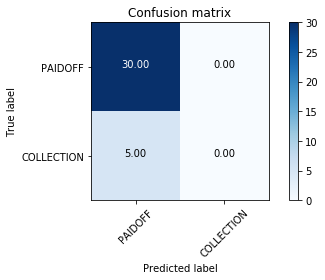

In [65]:
# Compute Confusion Matrix
cnf_matrix_LR_saga = confusion_matrix(y_test, yhat_LR_saga, labels=['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_LR_saga))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR_saga, classes=['PAIDOFF','COLLECTION'], title='Confusion matrix'
)

In [66]:
# Jaccard similarity index
jaccard_similarity_score(y_test, yhat_LR_saga)

0.8571428571428571

In [67]:
# f-1 score
f1_score(y_test, yhat_LR_saga, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7912087912087912

In [68]:
# Log loss
log_loss(y_test, yhat_LR_saga_prob)

0.4386973302758961

# Model Evaluation using Test set

In [69]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [70]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-07-14 17:54:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-07-14 17:54:01 (690 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [71]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### 1/ Preprocessing Test Set for K-means, SVM and Logistic Regression

In [72]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [73]:
X_T = test_Feature
y_T = test_df['loan_status'].values

In [74]:
X_T= preprocessing.StandardScaler().fit(X_T).transform(X_T)
X_T[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.2 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 ,  5.1 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.2 , -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 , -0.2 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.2 , -0.86]])

### 2/ Preprocessing Test Set for the Decision Tree

In [75]:
test_df['education'].unique().tolist()

['Bechalor', 'Master or Above', 'High School or Below', 'college']

In [76]:
X_T_tree = test_df[['Principal','terms','age','Gender','weekend', 'education']]
X_T_tree.replace(to_replace=test_df['education'].unique().tolist(), value=[0, 1, 2, 3], inplace=True)
X_T_tree.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Principal,terms,age,Gender,weekend,education
0,1000,30,50,1,0,0
1,300,7,35,0,1,1
2,1000,30,43,1,1,2
3,1000,30,26,0,1,3
4,800,15,29,0,1,0


### Model Accuracy

### K-means (k=7)

In [77]:
neigh7 = KNeighborsClassifier(n_neighbors = 7).fit(X_T, y_T)
yhat_KN7 = neigh7.predict(X_T)

In [78]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, yhat_KN7))
print("f1 score: ", f1_score(y_T, yhat_KN7, average='weighted'))

Jaccard similarity score:  0.8703703703703703
f1 score:  0.8687700045724738


### Decision Tree

In [79]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree.fit(X_T_tree, y_T)
predictionTree = decisionTree.predict(X_T_tree)

In [80]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, predictionTree))
print("f1 score: ", f1_score(y_T, predictionTree, average='weighted'))

Jaccard similarity score:  0.8148148148148148
f1 score:  0.818613485280152


### SVM (kernel='rbf')

In [81]:
clf_T_rbf = svm.SVC(kernel='rbf')
clf_T_rbf.fit(X_T, y_T)
yhat_SVM_T_rbf = clf_T_rbf.predict(X_T)

In [82]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, yhat_SVM_T_rbf))
print("f1 score: ", f1_score(y_T, yhat_SVM_T_rbf, average='weighted'))

Jaccard similarity score:  0.8703703703703703
f1 score:  0.8539804171988081


### SVM (kernel='linear')

In [83]:
clf_T_linear = svm.SVC(kernel='linear')
clf_T_linear.fit(X_T, y_T)
yhat_SVM_T_linear = clf_T_linear.predict(X_T)

In [84]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, yhat_SVM_T_linear))
print("f1 score: ", f1_score(y_T, yhat_SVM_T_linear, average='weighted'))

Jaccard similarity score:  0.7777777777777778
f1 score:  0.7823361823361823


### Logistic Regression (Solver='liblinear')

In [85]:
LRT_ll = LogisticRegression(C=0.01, solver='liblinear').fit(X_T, y_T)
yhatT_LR_ll = LRT_ll.predict(X_T)
yhatT_LR_ll_prob = LRT_ll.predict_proba(X_T)

In [86]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, yhatT_LR_ll))
print("f1 score: ", f1_score(y_T, yhatT_LR_ll, average='weighted'))
print("Log loss: ", log_loss(y_T, yhatT_LR_ll_prob))

Jaccard similarity score:  0.7777777777777778
f1 score:  0.7823361823361823
Log loss:  0.6346507098403633


### Logistic Regression (Solver='saga')

In [87]:
LRT_saga = LogisticRegression(C=0.01, solver='saga', penalty='l2').fit(X_T, y_T)
yhatT_LR_saga = LRT_saga.predict(X_T)
yhatT_LR_saga_prob = LRT_saga.predict_proba(X_T)

In [88]:
print("Jaccard similarity score: ", jaccard_similarity_score(y_T, yhatT_LR_saga))
print("f1 score: ", f1_score(y_T, yhatT_LR_saga, average='weighted'))
print("Log loss: ", log_loss(y_T, yhatT_LR_saga_prob))

Jaccard similarity score:  0.7407407407407407
f1 score:  0.6304176516942475
Log loss:  0.5377563359769101


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm                               | Jaccard | F1-score | LogLoss |
|-----------------------------------------|---------|----------|---------|
| KNN (k=7)                               | 0.87    | 0.87     | NA      |
| Decision Tree                           | 0.83    | 0.82     | NA      |
| SVM (kernel='rbf')                      | 0.87    | 0.85     | NA      |
| SVM (kernel='linear')                   | 0.78    | 0.78     | NA      |
| LogisticRegression (solver='liblinear') | 0.78    | 0.78     | 0.63    |
| LogisticRegression (solver='saga')      | 0.74    | 0.63     | 0.54    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>